![image info](https://ineuron.ai/images/ineuron-logo.png)

# Forest Fire Predictor
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* We need to develop a model that takes into account the detected fires dataset and detects future fires using specific weather reports.
* using Sklearn for pre-processing
* Pandas, Numpy, Matplotlib for csv reading, Data Processing, Data Cleaning and Visualization

## 2) Data Collection.
* The dataset I used comes from UCI on Algerian Forest Fires. 
* Forest fire observations and data from two regions of Algeria are included in this dataset: Bejaia and Sidi Bel-Abbes.
* This dataset spans the period from June 2012 to September 2012. 
* Our project examined the possibility of using Machine Learning algorithms to predict forest fires in these regions based on certain weather features.

### 2.1 Import Data and Required Packages
* Installing Python, PyCharm, Monogodb, Git to Computer.
* Download the source dataset from UCI Repository.
* For Classification algorithm decided to predict the features Classes from the dataset which is Binary classification (fire, not fire).
* For Regression Problem algorithm decided to predict the feature FWI (Fire weather Index) which is 90%+ correlated to Classes Feature.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**2.2 Download and Import the CSV Data as Pandas DataFrame**

In [114]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [115]:
#dropping non required rows from the dataset - cleaning the data
df1 = df.drop(labels=[122,123,167], axis=0)

In [123]:
#dictionary for assigning values to index ranges
regions = {
    0 : "1",
    128 : "0",
}

In [128]:
#create series with index.map by forward filling missing values
df1['Region'] = pd.Series(df1.index.map(regions), index = df1.index).ffill()

In [125]:
df1.iloc[3:170]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
170,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire
171,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire


In [126]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0


**Show Top 5 Records**

In [66]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


**Shape of the dataset**

In [11]:
df.shape

(246, 15)

**Summary of the dataset**

In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244,246
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,1
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,128


**Check Datatypes in the dataset**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    object
dtypes: object(15)
memory usage: 29.0+ KB


## Define numerical & categorical columns

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 15 categorical features : ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region']


#### proportion of count data on categorical columns

In [8]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

01                               3.252033
02                               3.252033
30                               3.252033
29                               3.252033
28                               3.252033
27                               3.252033
26                               3.252033
25                               3.252033
24                               3.252033
23                               3.252033
22                               3.252033
21                               3.252033
20                               3.252033
19                               3.252033
18                               3.252033
17                               3.252033
16                               3.252033
15                               3.252033
03                               3.252033
04                               3.252033
05                               3.252033
06                               3.252033
07                               3.252033
08                               3

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Categorical Features

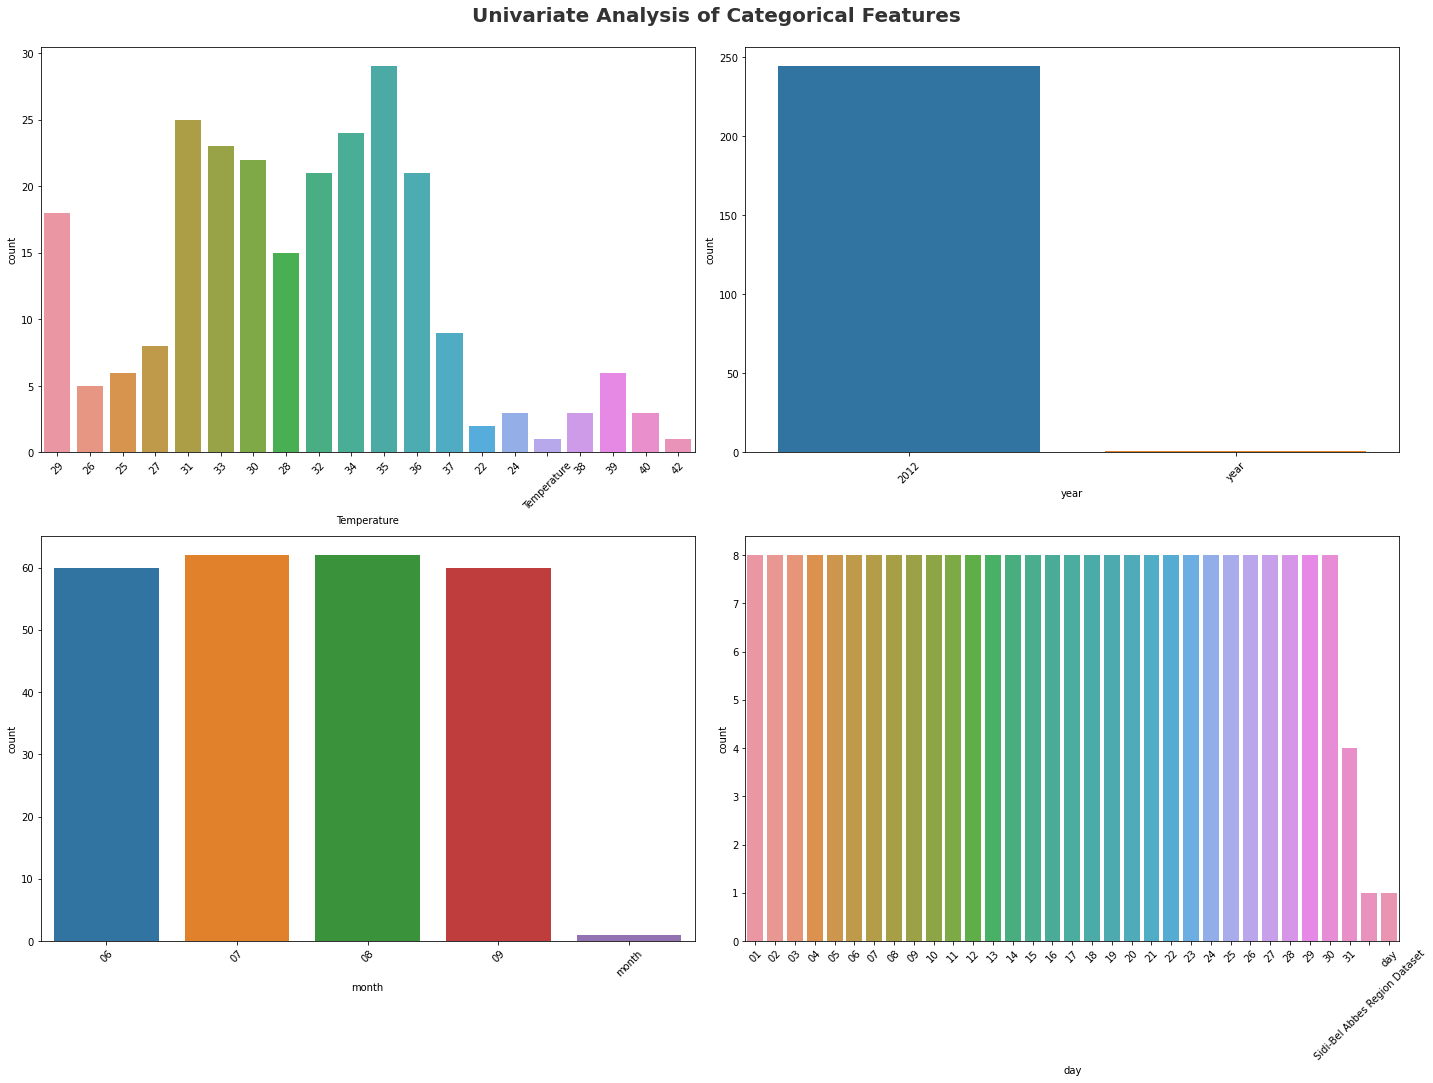

In [9]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Temperature','year','month','day']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**observations:**
* Temperature feature above shows the highest reached temperature was around 30.
* The day feature graph shows almost the whole month the count remained the same.
* year also in 2012 analysis has taken place as clearly shown in the graph.

####  how many columns are in the dataframe

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Renaming column names so as to remove spaces behind

In [129]:
df1.rename(columns={'Rain ': 'Rain', 'Classes  ': 'classes'}, inplace=True)

In [27]:
df.nunique()

day             33
month            6
year             3
Temperature     21
 RH             64
 Ws             20
Rain            41
FFMC           174
DMC            167
DC             199
ISI            107
BUI            175
FWI            128
classes          9
Region           2
dtype: int64

#### checking for null values and dropping them if any

In [11]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
df['month'].fillna(0,inplace=True)

In [14]:
df['year'].fillna(0,inplace=True)

In [15]:
df['Temperature'].fillna(0,inplace=True)

In [17]:
df[' RH'].fillna(0,inplace=True)

In [18]:
df[' Ws'].fillna(0,inplace=True)

In [28]:
df['Rain'].fillna(0,inplace=True)

In [29]:
df['FFMC'].fillna(0,inplace=True)

In [30]:
df['DMC'].fillna(0,inplace=True)

In [ ]:
df['DMC'].fillna(0,inplace=True)

In [31]:
df['DC'].fillna(0,inplace=True)

In [32]:
df['ISI'].fillna(0,inplace=True)

In [38]:
df['BUI'].fillna(0,inplace=True)

In [33]:
df['FWI'].fillna(0,inplace=True)

In [36]:
df['classes'].fillna(0,inplace=True)

In [34]:
df['Region'].fillna(0,inplace=True)

#### checking for null values after imputation

In [39]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
classes        0
Region         0
dtype: int64

### Relationship analysis

In [154]:
#dropping categorical values in order to get the correlation between the features
df2 = df1.drop(['year','classes','Region'], axis=1)

In [155]:
#converting to numeric incase if any value found which is not numeric
df2.astype(float)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
241,26.0,9.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,27.0,9.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,28.0,9.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29.0,9.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


#### Joint Plot
* This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds.

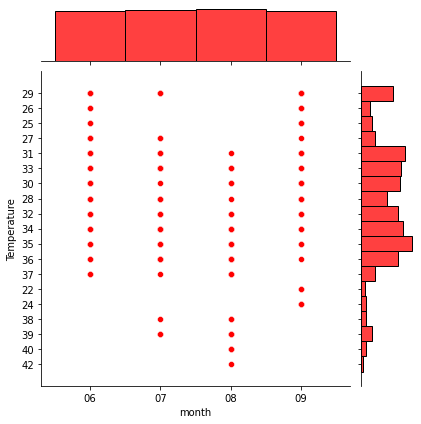

In [140]:
sns.jointplot(x='month',y='Temperature',data=df2,color='r')

#### observation:
* The above plot displays a scatterplot with two histograms at the margins of the graph.
* The highest Temperature observed was on August month which has 42F according to the above graph.
* The strength of the relationship appears to be stable because the points are restricted in the graph. 
* By seeing the marginal histograms, we can conclude that there are very minimal number of outliers w.r.t the features in consideration.

In [144]:
df2 = (df2['day']).astype(int)

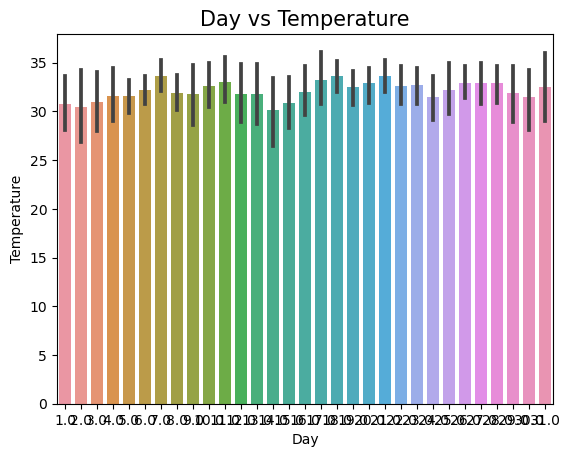

In [165]:
#Barplot

plt.style.use("default")
sns.barplot(x='day', y='Temperature',data=df2)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

#### observations:
* Temperature is shown on the Y-axis with respect to each and every day of a month on X-axis
* In the date 17th and 31st of the month the temperature is at its peak.
* But huge variation of the temperature is not there in this month.

In [163]:
#converting temperature values to float values which is helpful in analysing the relationship between the variables.
df2 = df2.explode('Temperature')
df2['Temperature'] = df2['Temperature'].astype('float')


#### violin plot
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

<AxesSubplot:xlabel='day', ylabel='Temperature'>

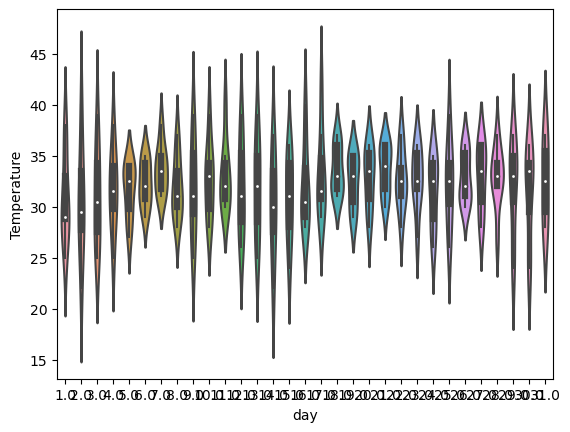

In [164]:
sns.violinplot(data=df2, x='day', y='Temperature')

#### observation:
* The maximum temperature above 45deg Celsius is seen on 17th and 2nd of the month which is considered for the correlation.
* And also in the same day huge temperature variation can be seen on 2nd of the month as you can see above graph.

#### Pairplot
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

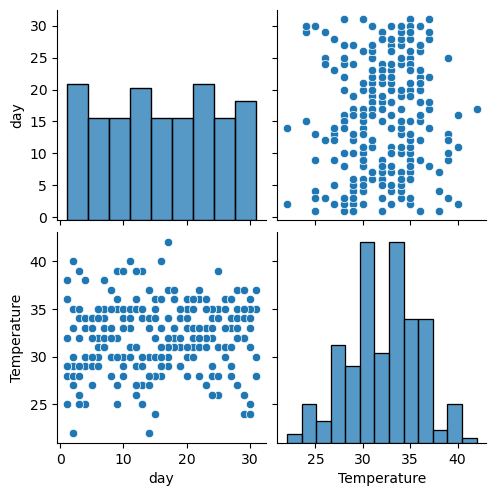

In [166]:
sns.pairplot(df2)

#### observations:
* Normal distribution of temperature can be seen in above histogram
* And by also seeing the scattered plot we can say that the temperature variation is very minimal as the points are equally scattered.


#### Line plot
A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value. 

<AxesSubplot:xlabel='Temperature', ylabel='day'>

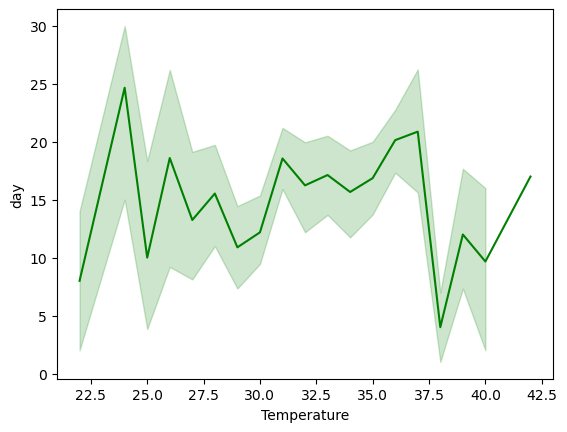

In [167]:
sns.lineplot(x='Temperature',y='day',data=df2,color='g')

#### observations:
* Very low temperature at the end of the month
* Very high temperature at the beginning of the month
* Moderate temperature at the middle of the month

#### Histogram
A histogram is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size.

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

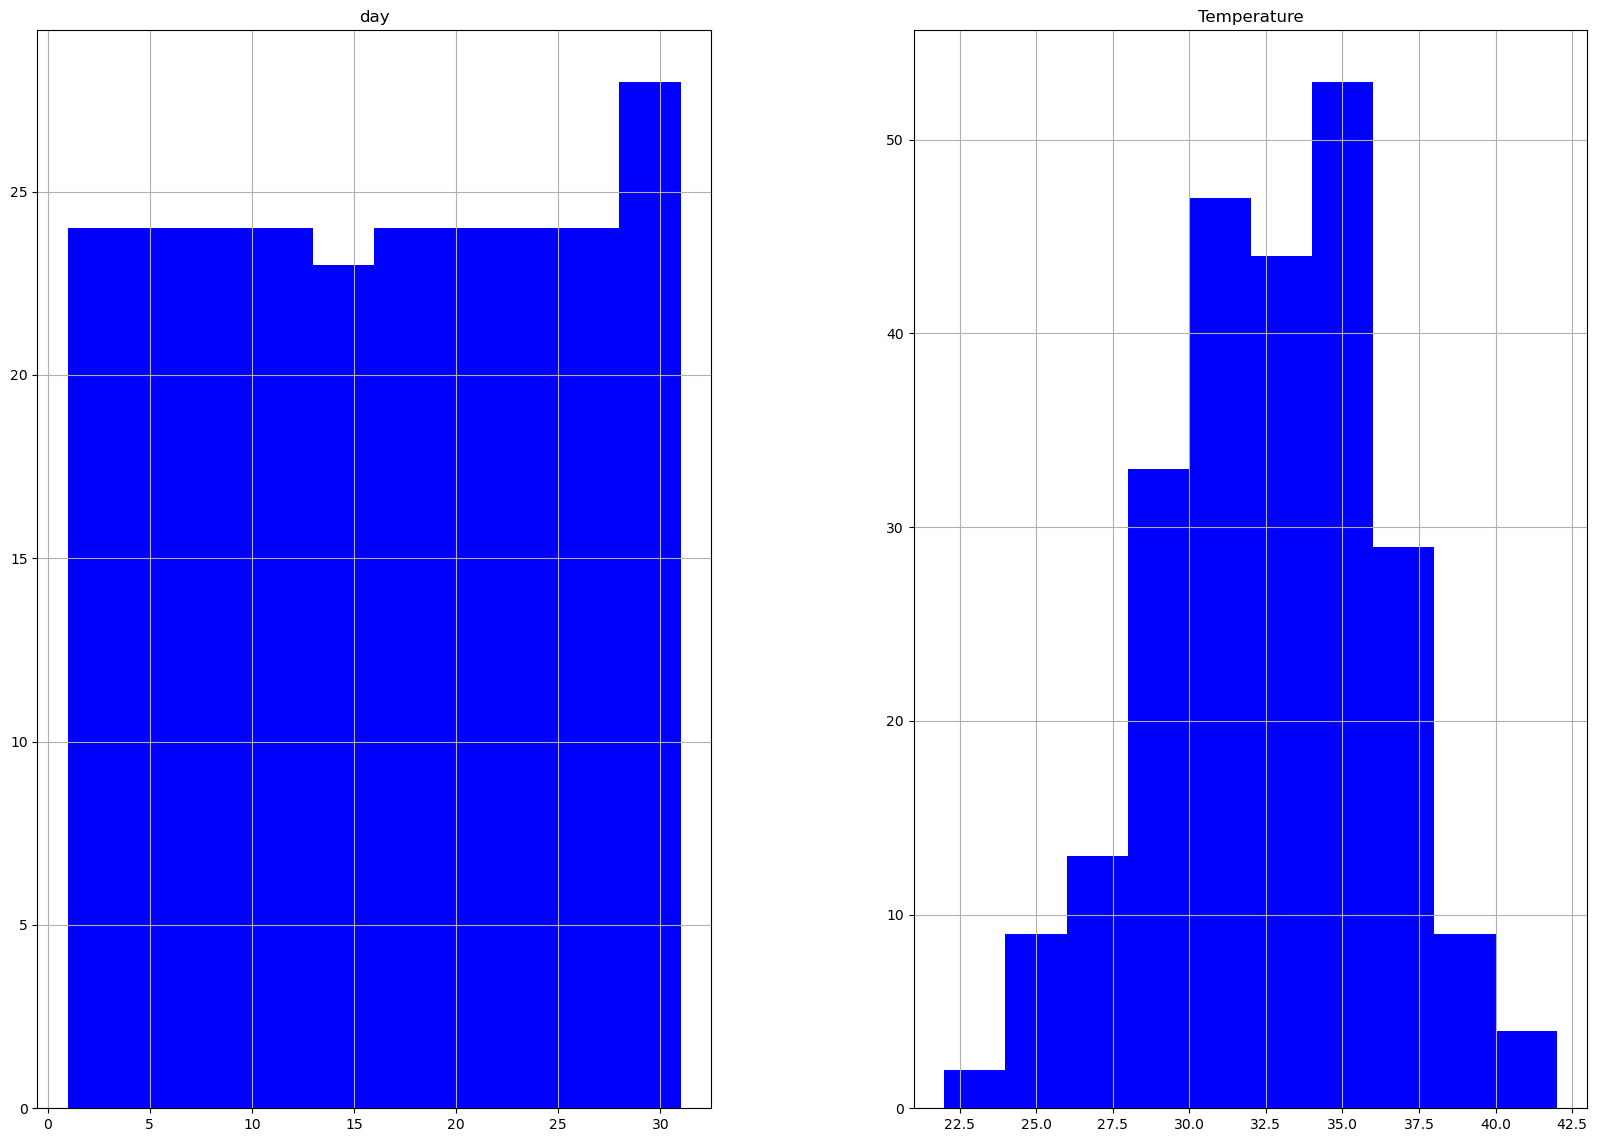

In [168]:
df2.hist(figsize=(20,14),color='b')

#### observations:
* First plot is just a day distribution in a month
* second plot/histogram as we can see temperature is normally distributed throughout the month

#### Heatmap
A histogram is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

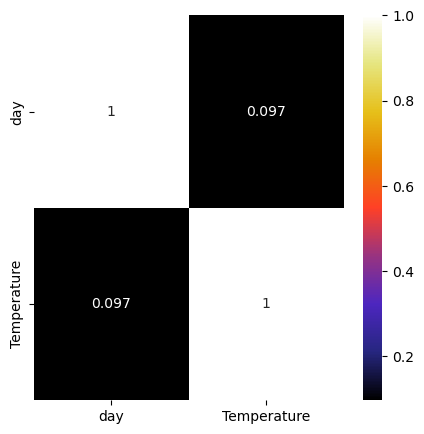

In [172]:
plt.figure(figsize = (5,5))
sns.heatmap(df2.corr(), cmap="CMRmap", annot=True)
plt.show()

#### observations;
* There is no negative impact of the temperature of all the days in a month which is considered.
* Each square shows the correlation between the variables on each axis. 
* Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.
* The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
* A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
* The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). 